In [1]:
!pip install dsp_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.9 MB/s eta 0:00:00


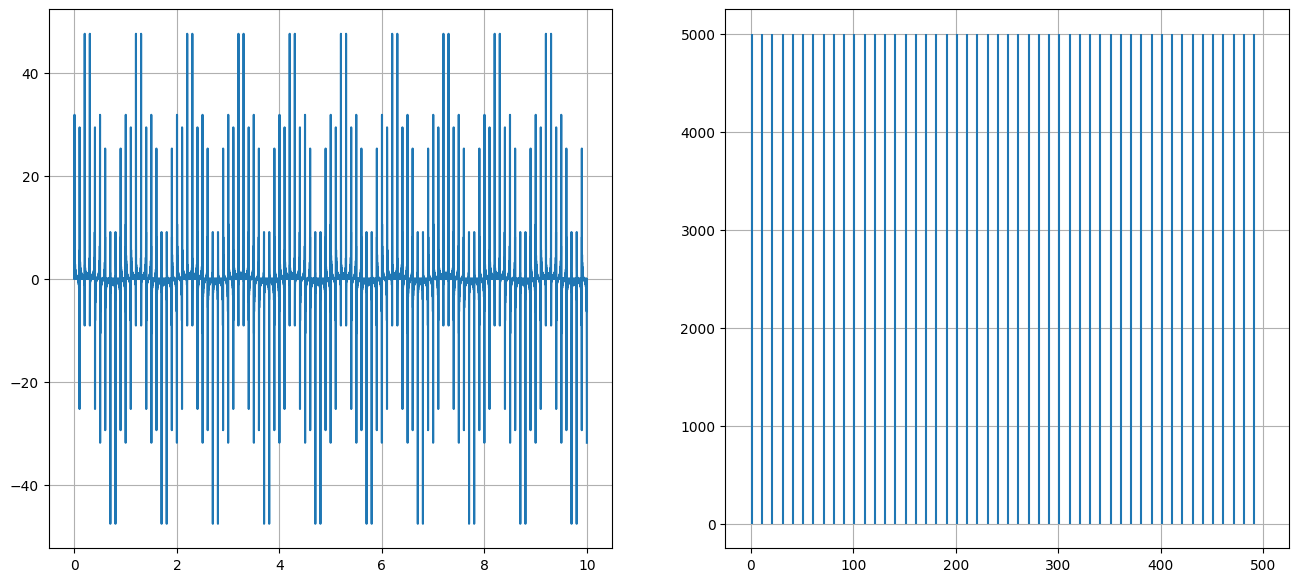

interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

@interact(fc=(0, 500, 10), BW=(10, 250, 10), gain=(-10, 10, 1))
def equalizer(fc=100, BW=10, gain=0):
    f0 = fc-BW
    f1 = fc+BW
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (gain / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()

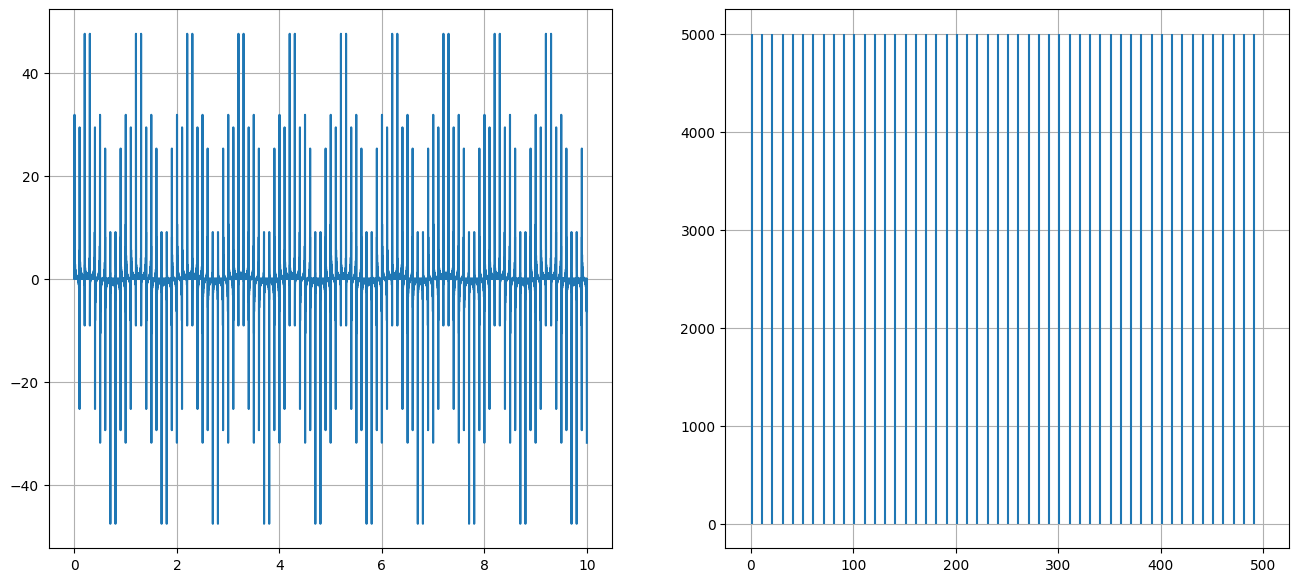

interactive(children=(IntSlider(value=0, description='gain1', max=10, min=-10), IntSlider(value=0, description…

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

# Función de filtro pasa banda
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

# Configuración del visualizador
vis = Visualizer(figsize=(16, 7), dpi=100)

# Generación de la señal
f = np.arange(1, 500, 10)
generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

# Ecualizador de 5 bandas
@interact(
    gain1=(-10, 10, 1),
    gain2=(-10, 10, 1),
    gain3=(-10, 10, 1),
    gain4=(-10, 10, 1),
    gain5=(-10, 10, 1)
)
def equalizer(gain1=0, gain2=0, gain3=0, gain4=0, gain5=0):
    sample_rate = generador.sampling_rate

    # Definir límites de las bandas
    bands = [
        (10, 60),   # Banda 1
        (60, 120),  # Banda 2
        (120, 250), # Banda 3
        (250, 400), # Banda 4
        (400, 499)  # Banda 5
    ]

    # Aplicar filtro y ajustar ganancia para cada banda
    gains_db = [gain1, gain2, gain3, gain4, gain5]
    filtered_signals = []

    for (f0, f1), gain in zip(bands, gains_db):
        if f0 <= 0:
            f0 = 0.1
        if f1 >= sample_rate / 2:
            f1 = sample_rate / 2 - 0.1

        # Filtrar señal y aplicar ganancia
        band_signal = filter_(signal, f0, f1, sample_rate)
        # Normalizar la banda (ajustar amplitud a la misma escala)
#        band_signal /= np.max(np.abs(band_signal))  # Normalización
        band_signal *= np.power(10, gain / 20)  # Convertir dB a escala lineal
        filtered_signals.append(band_signal)


    # Combinar todas las bandas
    signal_equalized = np.sum(filtered_signals, axis=0)

    # Visualización
    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()
